In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
# Display settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
data=pd.read_excel(r"C:\Users\faiza\ML case study\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform\Womens Clothing Reviews Data.xlsx")

## Detailed Exploratory analysis

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB
None


In [4]:
data.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [5]:
data.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [6]:
data.describe()

,Product ID,Customer Age,Rating,Recommend Flag
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362
std,203.298980,12.279544,1.110031,0.382216
min,0.000000,18.000000,1.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000
50%,936.000000,41.000000,5.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000
max,1205.000000,99.000000,5.000000,1.000000


In [7]:
data.describe(include='object')

,Category,Subcategory1,SubCategory2,Location,Channel,Review Title,Review Text
count,23472,23472,23472,23486,23486,19676,22641
unique,3,6,20,4,2,13993,22634
top,General,Tops,Dresses,Gurgaon,Web,Love it!,Perfect fit and i've gotten so many compliment...
freq,13850,10468,6319,8821,13583,136,3


In [8]:
# Step 3: Missing Value Analysis
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print("\nColumns with Missing Values (%):")
print(missing_percentage)


Columns with Missing Values (%):
Review Title    16.222430
Review Text      3.597888
Category         0.059610
Subcategory1     0.059610
SubCategory2     0.059610
dtype: float64


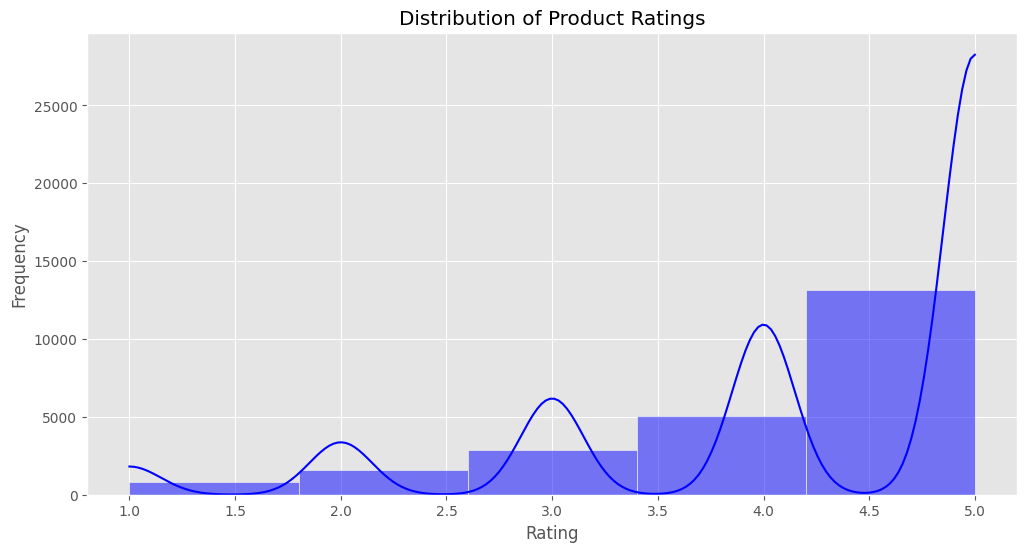

In [9]:
# Step 4: Distribution Plots
# Histogram for Ratings
sns.histplot(data['Rating'], bins=5, kde=True, color='blue')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

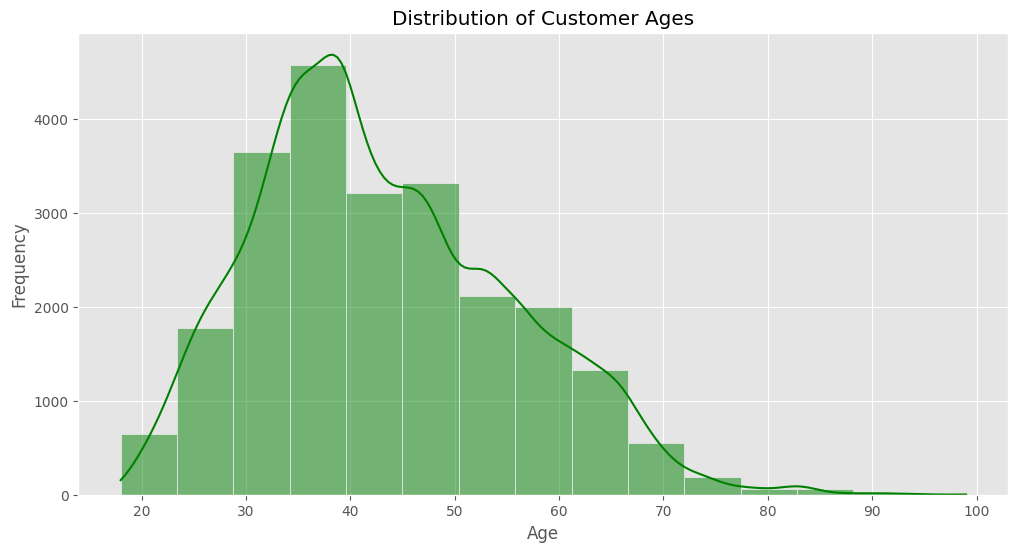

In [10]:
# Histogram for Customer Age
sns.histplot(data['Customer Age'], bins=15, kde=True, color='green')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\faiza\AppData\Local\Temp\ipykernel_5048\4136094541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index, palette='Set2')


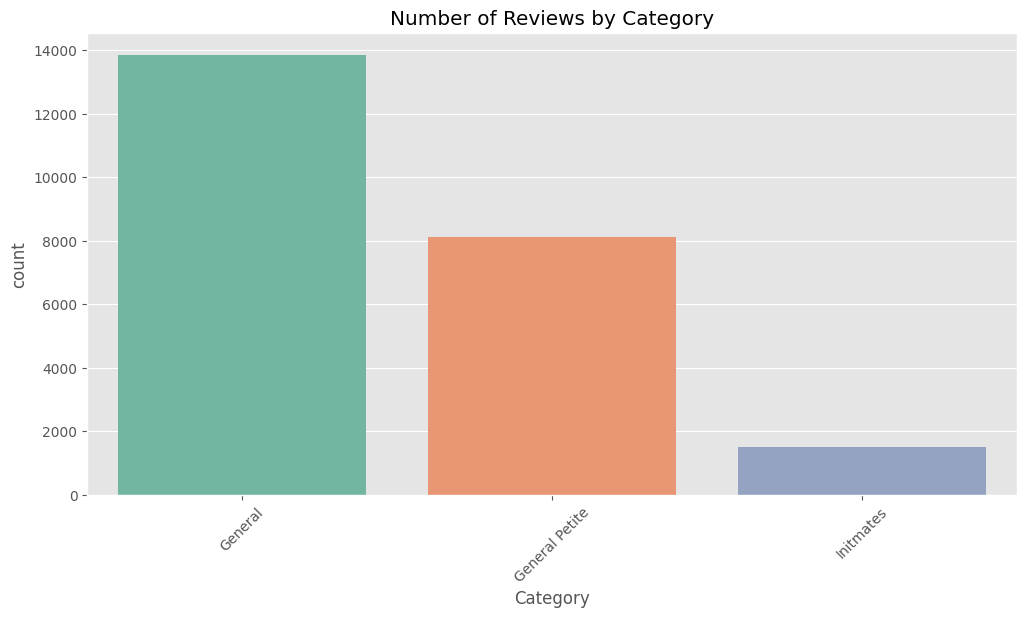

In [11]:
# Count plot for categories
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index, palette='Set2')
plt.title('Number of Reviews by Category')
plt.xticks(rotation=45)
plt.show()

C:\Users\faiza\AppData\Local\Temp\ipykernel_5048\2426459799.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Location', order=data['Location'].value_counts().index, palette='Set3')


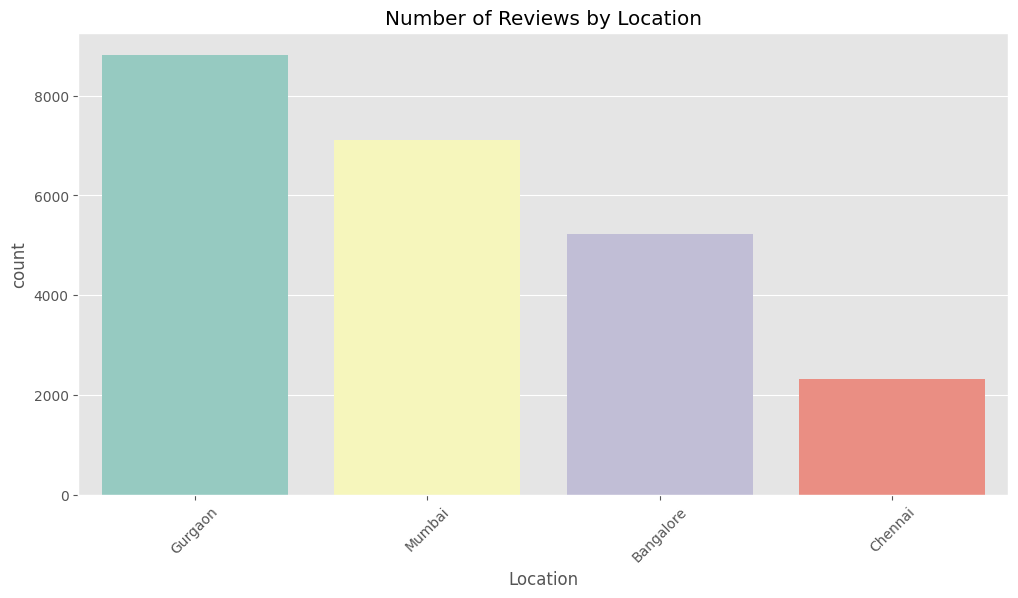

In [12]:
# Count plot for locations
sns.countplot(data=data, x='Location', order=data['Location'].value_counts().index, palette='Set3')
plt.title('Number of Reviews by Location')
plt.xticks(rotation=45)
plt.show()

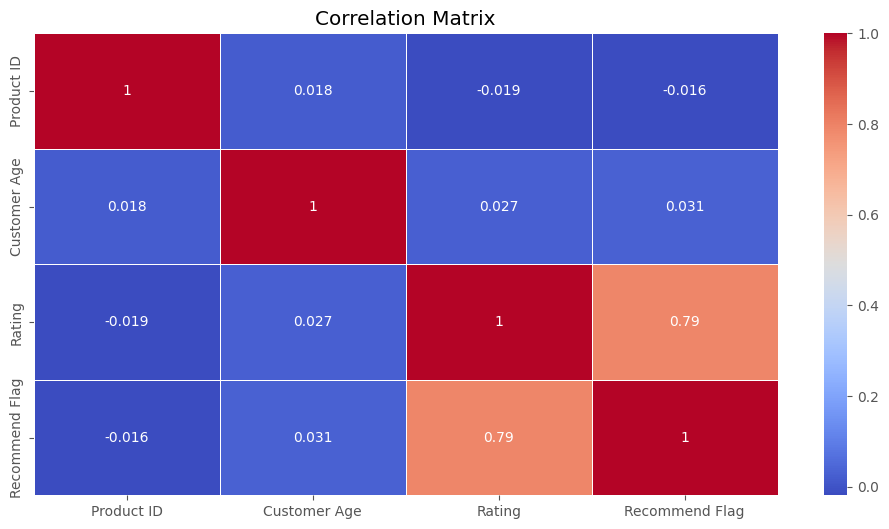

In [13]:
# Step 5: Correlation Analysis
corr_matrix = data.select_dtypes(include="number").corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

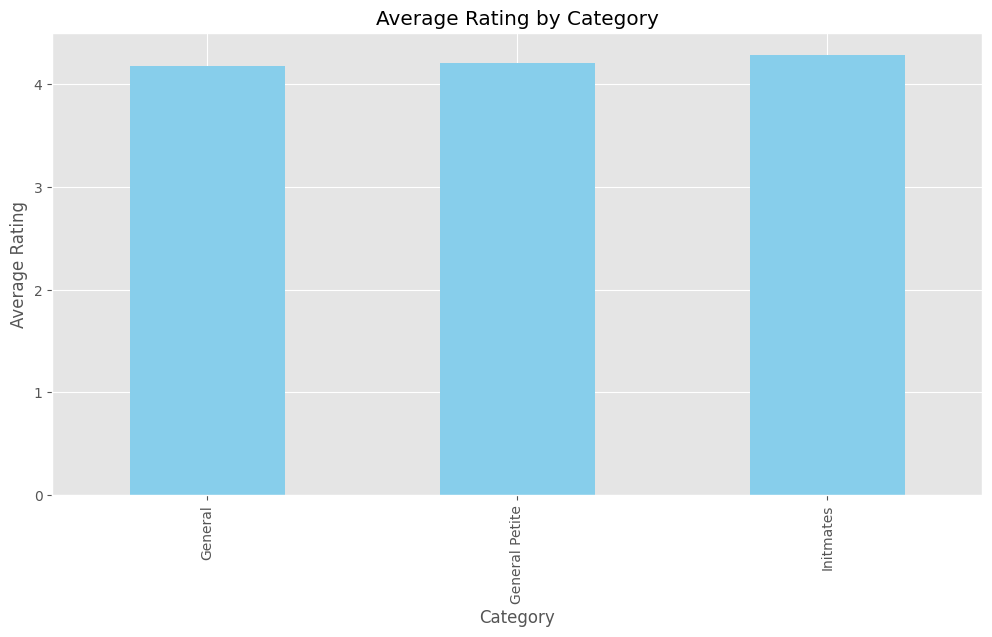

In [14]:
# Step 6: Relationships Between Variables
# Average rating by category
avg_rating_by_category = data.groupby('Category')['Rating'].mean().sort_values()
avg_rating_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

In [15]:
# Step 7: Sentiment Analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
# Apply sentiment analysis
data['Sentiment Score'] = data['Review Text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\faiza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


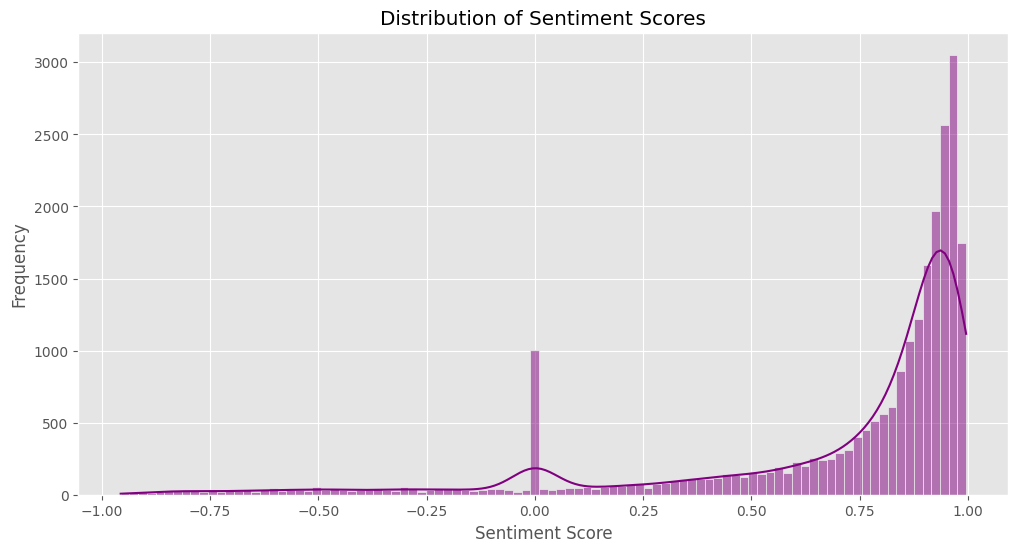

In [16]:
# Sentiment distribution
sns.histplot(data['Sentiment Score'], kde=True, color='purple')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

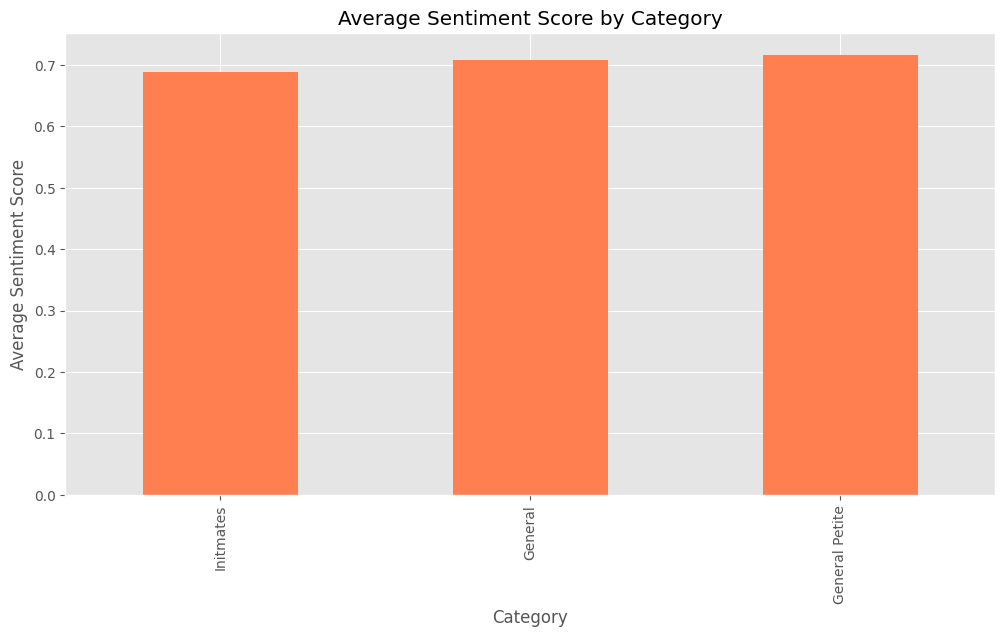

In [17]:
# Average sentiment score by category
avg_sentiment_by_category = data.groupby('Category')['Sentiment Score'].mean().sort_values()
avg_sentiment_by_category.plot(kind='bar', color='coral')
plt.title('Average Sentiment Score by Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.show()

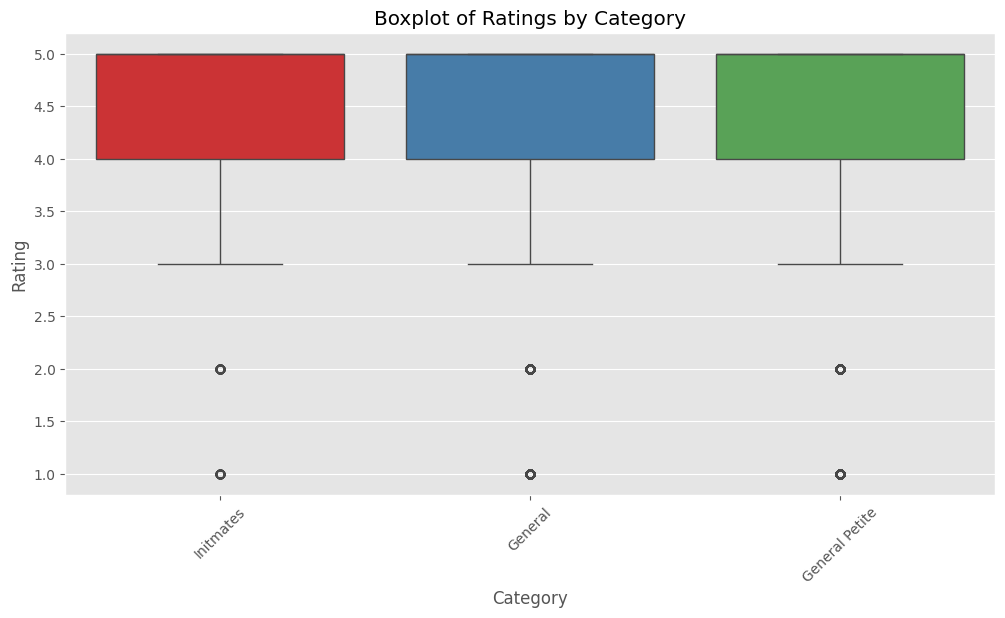

In [18]:
# Step 8: Boxplots for visualizing variation
sns.boxplot(data=data, x='Category', y='Rating',hue='Category',legend=False, palette='Set1')
plt.title('Boxplot of Ratings by Category')
plt.xticks(rotation=45)
plt.show()

## Perform text mining tasks to understand what most frequent words are using for positive sentiment and negative sentiment. Create word clouds for the positive & negative reviews separately. 

In [19]:
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 50 words in positive reviews: [('dress', 7933), ('love', 7708), ('size', 7001), ('fit', 5547), ('wear', 5400), ('great', 5373), ('top', 5365), ('like', 4819), ('im', 4726), ('color', 3586), ('perfect', 3474), ('small', 3377), ('would', 3317), ('little', 3240), ('fabric', 3231), ('flattering', 2907), ('soft', 2895), ('look', 2815), ('really', 2801), ('comfortable', 2791), ('one', 2774), ('ordered', 2746), ('well', 2642), ('fits', 2599), ('bought', 2591), ('nice', 2422), ('bit', 2414), ('beautiful', 2307), ('cute', 2283), ('length', 2162), ('jeans', 2128), ('looks', 2121), ('large', 2016), ('got', 2010), ('back', 1965), ('colors', 1959), ('long', 1932), ('sweater', 1913), ('petite', 1881), ('material', 1868), ('much', 1798), ('medium', 1796), ('also', 1766), ('shirt', 1731), ('think', 1708), ('waist', 1697), ('xs', 1668), ('pretty', 1606), ('usually', 1601), ('store', 1584)]
Top 50 words in negative reviews: [('dress', 1116), ('like', 1048), ('top', 820), ('would', 723), ('fabric', 7

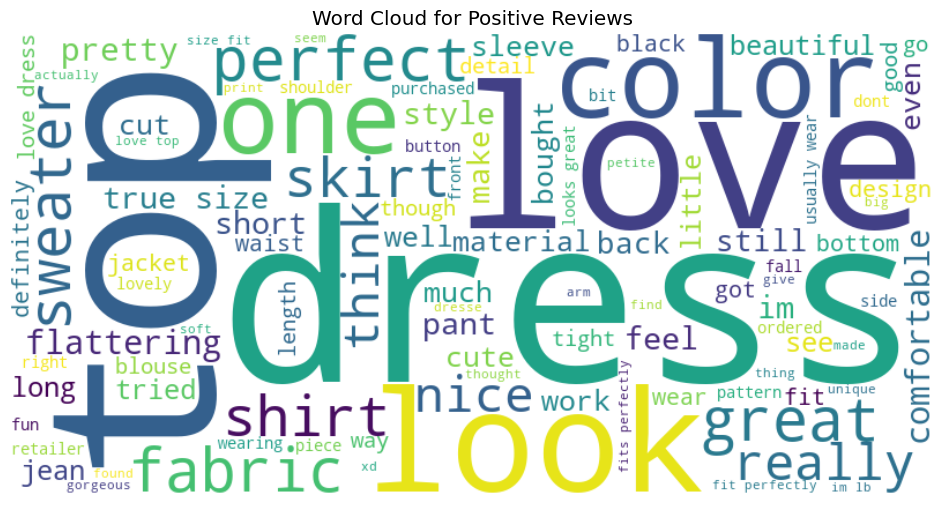

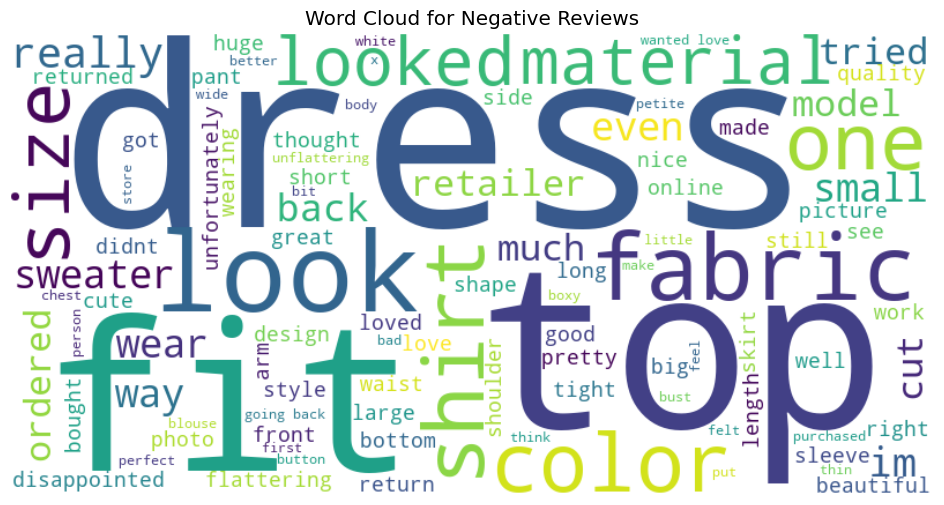

In [20]:
# Step 1: Separate positive and negative reviews
positive_reviews = data[data['Rating'] >= 4]['Review Text'].dropna()
negative_reviews = data[data['Rating'] < 3]['Review Text'].dropna()

# Step 2: Preprocess the text data
import re
from collections import Counter

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove non-alphabetic characters and lowercase the text
    words = re.sub(r'[^a-zA-Z\s]', '', text).lower().split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return words

# Combine all words from positive and negative reviews
positive_words = []
negative_words = []

for review in positive_reviews:
    positive_words.extend(preprocess_text(review))

for review in negative_reviews:
    negative_words.extend(preprocess_text(review))

# Step 3: Get the most common words
positive_word_freq = Counter(positive_words).most_common(50)
negative_word_freq = Counter(negative_words).most_common(50)

# Display the most common words
print("Top 50 words in positive reviews:", positive_word_freq)
print("Top 50 words in negative reviews:", negative_word_freq)

# Step 4: Create word clouds
def create_word_cloud(words, title):
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100, width=800, height=400).generate(' '.join(words))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

create_word_cloud(positive_words, 'Word Cloud for Positive Reviews')
create_word_cloud(negative_words, 'Word Cloud for Negative Reviews')


## Understand sentiment among the customers on the different categories, sub categories, products by location and age group 

In [127]:
# Step 1: Calculate sentiment scores for each review
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review text
data['Sentiment Score'] = data['Review Text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])


# Step 2: Group data and calculate average sentiment
# Sentiment by category
avg_sentiment_by_category = data.groupby('Category')['Sentiment Score'].mean().sort_values()

# Sentiment by subcategory
avg_sentiment_by_subcategory1 = data.groupby('Subcategory1')['Sentiment Score'].mean().sort_values()
avg_sentiment_by_subcategory2 = data.groupby('SubCategory2')['Sentiment Score'].mean().sort_values()

# Sentiment by product ID
avg_sentiment_by_product = data.groupby('Product ID')['Sentiment Score'].mean().sort_values()

# Sentiment by location
avg_sentiment_by_location = data.groupby('Location')['Sentiment Score'].mean().sort_values()

# Sentiment by age group (e.g., 10-year intervals)
data['Age Group'] = pd.cut(data['Customer Age'], bins=range(10, 101, 10), labels=[f"{i}-{i+9}" for i in range(10, 100, 10)])
avg_sentiment_by_age_group = data.groupby('Age Group')['Sentiment Score'].mean().sort_values()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\faiza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\faiza\AppData\Local\Temp\ipykernel_5048\300521210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment Score'] = data['Review Text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
C:\Users\faiza\AppData\Local\Temp\ipykernel_5048\300521210.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age Group'] 

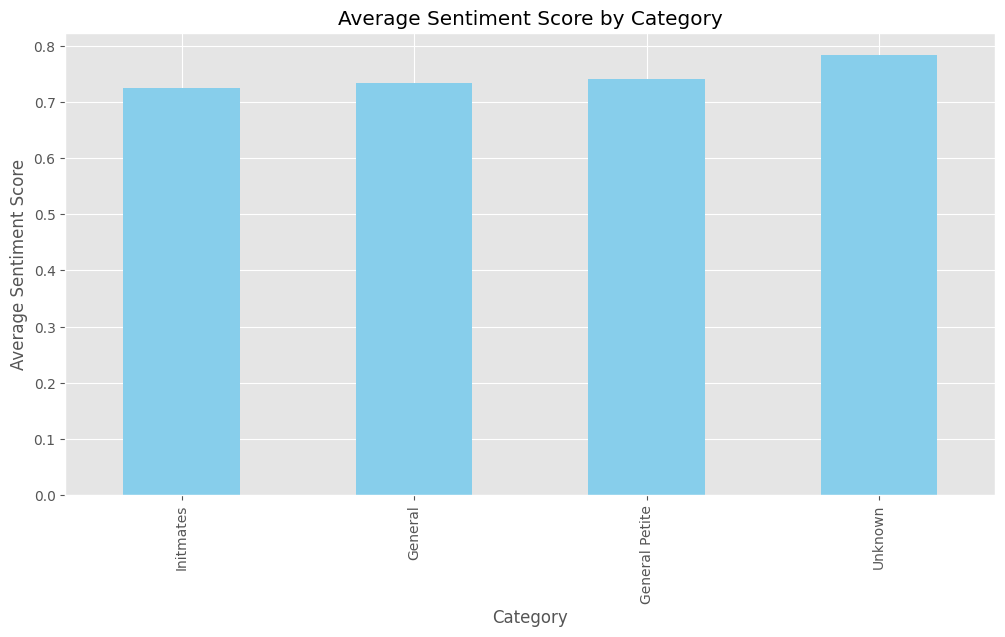

In [128]:
# Step 3: Visualize the results
# Plot sentiment by category
plt.figure(figsize=(12, 6))
avg_sentiment_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score by Category')
plt.xlabel('Category')
plt.ylabel('Average Sentiment Score')
plt.show()

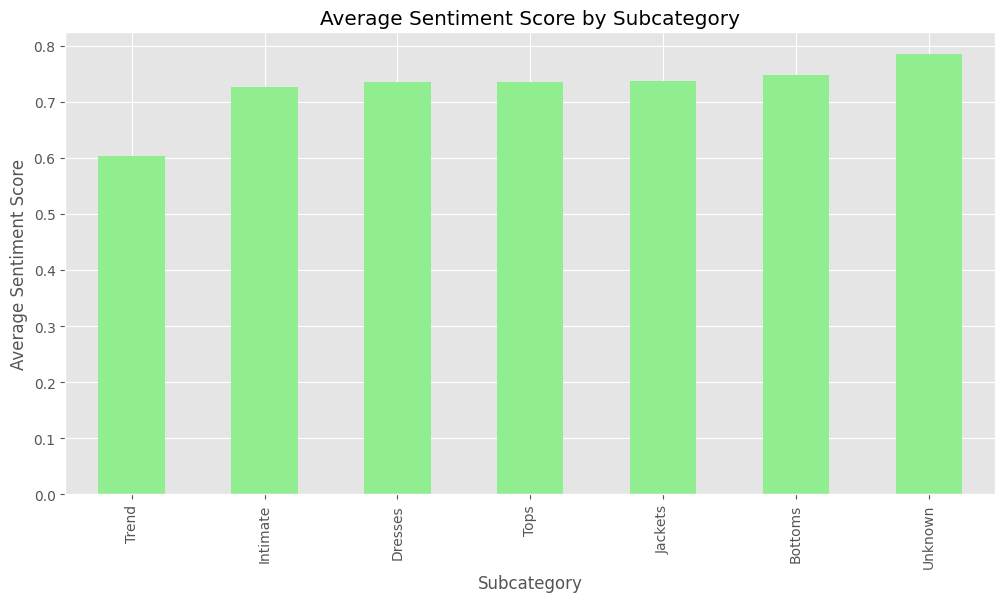

In [129]:
# Plot sentiment by subcategory
plt.figure(figsize=(12, 6))
avg_sentiment_by_subcategory1.plot(kind='bar', color='lightgreen')
plt.title('Average Sentiment Score by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Average Sentiment Score')
plt.show()

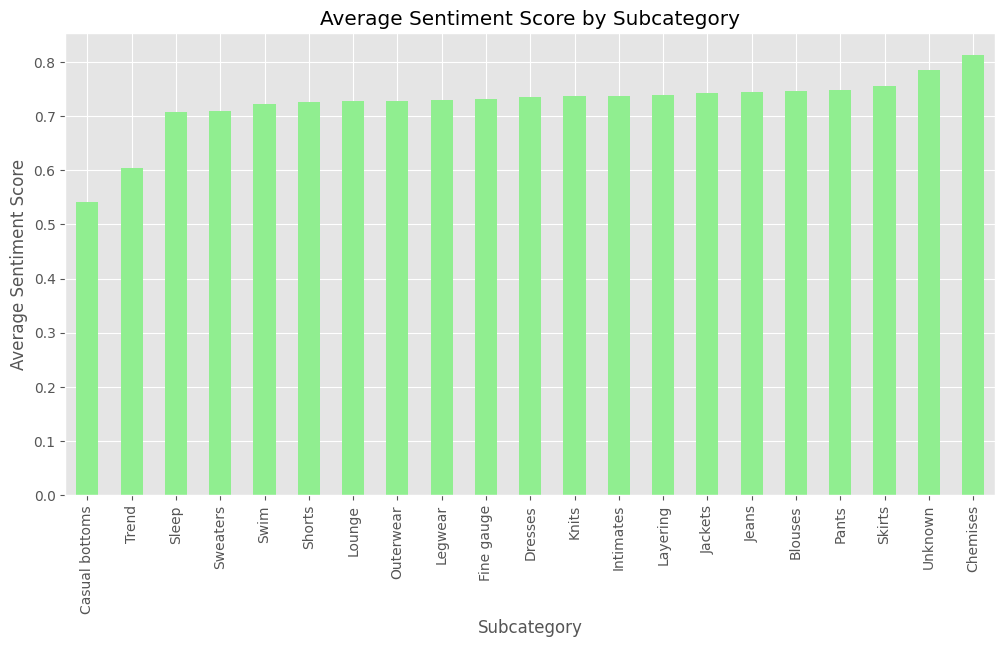

In [130]:
# Plot sentiment by subcategory
plt.figure(figsize=(12, 6))
avg_sentiment_by_subcategory2.plot(kind='bar', color='lightgreen')
plt.title('Average Sentiment Score by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Average Sentiment Score')
plt.show()

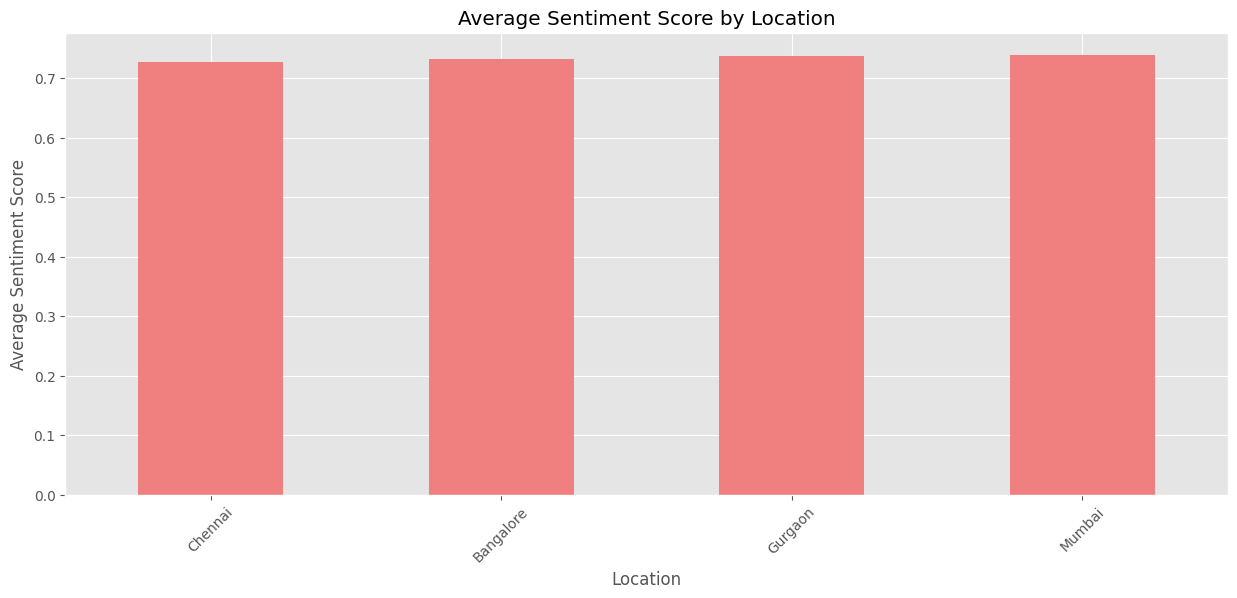

In [131]:
# Plot sentiment by location
plt.figure(figsize=(15, 6))
avg_sentiment_by_location.plot(kind='bar', color='lightcoral')
plt.title('Average Sentiment Score by Location')
plt.xlabel('Location')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

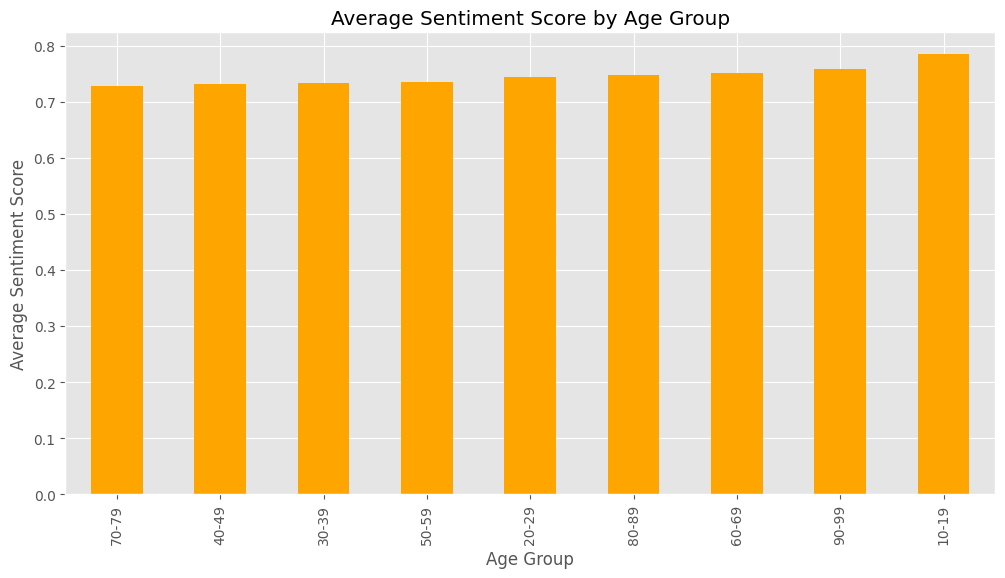

In [132]:
# Plot sentiment by age group
plt.figure(figsize=(12, 6))
avg_sentiment_by_age_group.plot(kind='bar', color='orange')
plt.title('Average Sentiment Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sentiment Score')
plt.show()

In [26]:
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Sentiment Score,Age Group
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0.8932,30-39
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,0.9729,30-39
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.9427,50-59
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.5727,40-49
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,0.9291,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0.9152,30-39
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0.6652,40-49
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,0.9343,30-39
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,0.6692,20-29


In [27]:
import pandas as pd 
import numpy as np 
import nltk
import contractions 
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\faiza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
data=pd.read_excel(r"C:\Users\faiza\ML case study\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform\Womens Clothing Reviews Data.xlsx")

## Perform predictive analytics to understand the drivers of customers who are recommending the products. 

In [29]:
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [30]:
data.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [31]:
data['Review Text'] = data['Review Text'].fillna('')
data['Review Title'] = data['Review Title'].fillna('')
data['Category'] = data['Category'].fillna('Unknown')
data['Subcategory1'] = data['Subcategory1'].fillna('Unknown')
data['SubCategory2'] = data['SubCategory2'].fillna('Unknown')

In [32]:
data.shape

(23486, 11)

## Data Pre-Processing

In [33]:
def convert_lower(text):
    text = text.lower()
    return text

def expand_contractions(text):
    text = contractions.fix(text)
    return text

def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]','',text)
    text = re.sub(r'\s+',' ',text)
    return text 

def stemming(text):
    l = text.split(' ')
    text = [ps.stem(w) for w in l]
    return ' '.join(text)

def lemmatization(text):
    text = [ls.lemmatize(w) for w in text.split(' ')]
    return ' '.join(text)

def stopword_removal(text):
    text = [w for w in text.split(' ') if w not in stopwords_l]
    return ' '.join(text)

def remove_mentions(text):
    text = re.sub(r'@\w+','',text)
    text = re.sub(r'[...]',' ',text)
    text = re.sub(r'&amp','',text)
    
    return text


In [34]:
def clean_text(text):
    text = convert_lower(text)
    
    text = expand_contractions(text)
    
    text = remove_mentions(text)
    
    text = remove_special_characters(text)
    
#     text = stemming(text)
    
    text = stopword_removal(text)
    
    text = lemmatization(text)
    
    text = text.strip()
    
    return text

In [35]:
ps = PorterStemmer()
ls = WordNetLemmatizer()
stopwords_l = nltk.corpus.stopwords.words('english')

In [36]:
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


In [37]:
data['clean_text'] = data['Review Text'].apply(lambda x:clean_text(x))

In [38]:
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,clean_text
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky sexy comfortable
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,,Love this dress! it's sooo pretty. i happene...,5,1,love dress sooo pretty happened find store gla...
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,high hope dress really wanted work initially o...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love jumpsuit fun flirty fabulous ev...
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,shirt flattering due adjustable front tie perf...
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,happy snag dress great price easy slip flatter...
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,reminds maternity clothes soft stretchy shiny ...
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,fit well top see never would worked glad able ...
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,bought dress wedding summer cute unfortunately...


In [39]:
data[data['clean_text']=='']

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,clean_text
92,861,General Petite,Tops,Knits,Gurgaon,Mobile,23,,,5,1,
93,1081,General,Dresses,Dresses,Gurgaon,Mobile,31,,,5,1,
98,1133,General,Jackets,Outerwear,Mumbai,Mobile,50,,,5,1,
135,861,General Petite,Tops,Knits,Gurgaon,Web,35,,,4,1,
142,1126,General,Jackets,Outerwear,Gurgaon,Web,35,,,5,1,
...,...,...,...,...,...,...,...,...,...,...,...,...
23258,862,General,Tops,Knits,Mumbai,Web,35,,,4,1,
23301,862,General,Tops,Knits,Mumbai,Web,52,,,5,1,
23303,823,General,Tops,Blouses,Mumbai,Mobile,46,,,5,1,
23470,1104,General Petite,Dresses,Dresses,Gurgaon,Web,39,,,5,1,


In [40]:
data = data[data['clean_text']!='']
data.reset_index(drop=True,inplace=True)

In [41]:
data.shape

(22641, 12)

## Word Embeddings

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf = TfidfVectorizer(min_df=2)

In [44]:
corpus = data['clean_text'].values

In [45]:
tfidf_df = tfidf.fit_transform(corpus)

In [46]:
tf_df = pd.DataFrame(tfidf_df.toarray(),columns=sorted(tfidf.vocabulary_.keys()))
tf_df.head()

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,zig,zigzag,zillion,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.143272,0.0,0.125689,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


## Split Data into Train and Test Set

In [48]:
data.shape, tf_df.shape

((22641, 12), (22641, 7530))

In [49]:

tf_df['sentiment'] = data['Recommend Flag']
tf_df.head()

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,zigzag,zillion,zip,zipped,zipper,zippered,zipping,zone,zoom,sentiment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.143272,0.0,0.125689,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1


In [50]:
Tf_X = tf_df.iloc[:,:-1]
Tf_Y = tf_df['sentiment']

## train test split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(Tf_X,Tf_Y,test_size=0.20,stratify=Tf_Y,random_state=45)

In [54]:
xtrain1.shape,xtest1.shape,ytrain1.shape,ytest1.shape

((18112, 7530), (4529, 7530), (18112,), (4529,))

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(class_weight="balanced",max_depth=5)

In [57]:
rfc.fit(xtrain1,ytrain1)
pred_rfc = rfc.predict(xtest1)

## Evaluation

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
acc_score2 = accuracy_score(ytest1,pred_rfc)
acc_score2

0.8251269595937293

In [60]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [61]:
acc_score2 = accuracy_score(ytest1,pred_rfc)
acc_score2

0.8251269595937293

In [62]:
print("Classification Report:\n", classification_report(ytest1, pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(ytest1, pred_rfc))

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.80      0.62       820
           1       0.95      0.83      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.73      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Confusion Matrix:
 [[ 659  161]
 [ 631 3078]]


## feature of importance

In [63]:
feature_importances = rfc.feature_importances_
feature_names = Tf_X.columns.tolist()

In [64]:
# Display the top 10 important features
important_features = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)
print("\nTop 10 Important Features Driving Recommendations:")
print(important_features.head(80))


Top 10 Important Features Driving Recommendations:
disappointed    0.051959
comfortable     0.033287
looked          0.025632
perfect         0.022291
unflattering    0.021321
                  ...   
thought         0.003496
boxy            0.003406
wide            0.003101
arm             0.003035
slightly        0.003017
Length: 80, dtype: float64


## Create topics and understand themes behind the topics by performing topic mining. 

In [65]:
import gensim 
from gensim import corpora

In [66]:
corpus_l=list(data['clean_text'].values)

In [67]:
corpus_tokens = [sent.split(' ') for sent in corpus_l]

In [68]:
dic = corpora.Dictionary(corpus_tokens)

In [69]:
corpus_tokens

[['absolutely', 'wonderful', 'silky', 'sexy', 'comfortable'],
 ['love',
  'dress',
  'sooo',
  'pretty',
  'happened',
  'find',
  'store',
  'glad',
  'never',
  'would',
  'ordered',
  'online',
  'petite',
  'bought',
  'petite',
  'love',
  'length',
  'hit',
  'little',
  'knee',
  'would',
  'definitely',
  'true',
  'midi',
  'someone',
  'truly',
  'petite'],
 ['high',
  'hope',
  'dress',
  'really',
  'wanted',
  'work',
  'initially',
  'ordered',
  'petite',
  'small',
  'usual',
  'size',
  'found',
  'outrageously',
  'small',
  'small',
  'fact',
  'could',
  'zip',
  'reordered',
  'petite',
  'medium',
  'ok',
  'overall',
  'top',
  'half',
  'comfortable',
  'fit',
  'nicely',
  'bottom',
  'half',
  'tight',
  'layer',
  'several',
  'somewhat',
  'cheap',
  'net',
  'layer',
  'going',
  'major',
  'design',
  'flaw',
  'net',
  'layer',
  'sewn',
  'directly',
  'zipper',
  'c'],
 ['love',
  'love',
  'love',
  'jumpsuit',
  'fun',
  'flirty',
  'fabulous',
  'eve

In [70]:
doc_term_matrix = [dic.doc2bow(d) for d in corpus_tokens]

In [71]:
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 3),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2)],
 [(1, 1),
  (7, 1),
  (19, 1),
  (20, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 3),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 3),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(15, 3),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1)],
 [(13, 1),
  (15, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (8

In [72]:
from gensim.models.ldamodel import LdaModel
lda  = LdaModel

In [73]:
terms_matrix = lda(doc_term_matrix,num_topics=5,id2word=dic,passes=3)

In [74]:
terms_matrix.print_topics(num_words=5)

[(0,
  '0.031*"love" + 0.025*"great" + 0.025*"color" + 0.019*"wear" + 0.017*"top"'),
 (1,
  '0.046*"size" + 0.026*"small" + 0.025*"fit" + 0.017*"ordered" + 0.016*"top"'),
 (2,
  '0.023*"like" + 0.022*"look" + 0.015*"would" + 0.014*"fabric" + 0.014*"top"'),
 (3,
  '0.038*"pant" + 0.020*"jean" + 0.018*"pair" + 0.017*"price" + 0.012*"love"'),
 (4,
  '0.078*"dress" + 0.010*"fabric" + 0.010*"love" + 0.010*"beautiful" + 0.008*"flattering"')]

## Performing predictive analysis tasks predicting rating based on the review. 

In [75]:
tf_df['Rating'] = data['Rating']
tf_df.head()

,aa,ab,abbey,abby,abdomen,ability,able,abnormally,abo,abou,...,zillion,zip,zipped,zipper,zippered,zipping,zone,zoom,sentiment,Rating
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1,5
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.143272,0.0,0.125689,0.0,0.0,0.0,0.0,0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1,5


In [77]:
tf_df=tf_df.drop(columns="sentiment")

In [78]:
Tf_X = tf_df.iloc[:,:-1]
Tf_Y = tf_df['Rating']

## train test split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(Tf_X,Tf_Y,test_size=0.20,stratify=Tf_Y,random_state=45)

In [81]:
xtrain1.shape,xtest1.shape,ytrain1.shape,ytest1.shape

((18112, 7530), (4529, 7530), (18112,), (4529,))

## model selection

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
rfc = RandomForestClassifier(class_weight="balanced",max_depth=10)

In [92]:
rfc.fit(xtrain1,ytrain1)
pred_rfc = rfc.predict(xtest1)

## evaluation

In [93]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [94]:
acc_score2 = accuracy_score(ytest1,pred_rfc)
acc_score2

0.559284610289247

In [95]:
print("Classification Report:\n", classification_report(ytest1, pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(ytest1, pred_rfc))

Classification Report:
               precision    recall  f1-score   support

           1       0.19      0.46      0.27       164
           2       0.23      0.32      0.27       310
           3       0.31      0.21      0.25       565
           4       0.38      0.31      0.34       982
           5       0.77      0.77      0.77      2508

    accuracy                           0.56      4529
   macro avg       0.37      0.41      0.38      4529
weighted avg       0.57      0.56      0.56      4529

Confusion Matrix:
 [[  75   40   22    8   19]
 [  87   98   57   28   40]
 [ 112  142  120  103   88]
 [  45   95  113  300  429]
 [  78   49   80  361 1940]]
